In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
#load the data

dataframe = pd.read_csv("winequalityN.csv")
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
dataframe.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

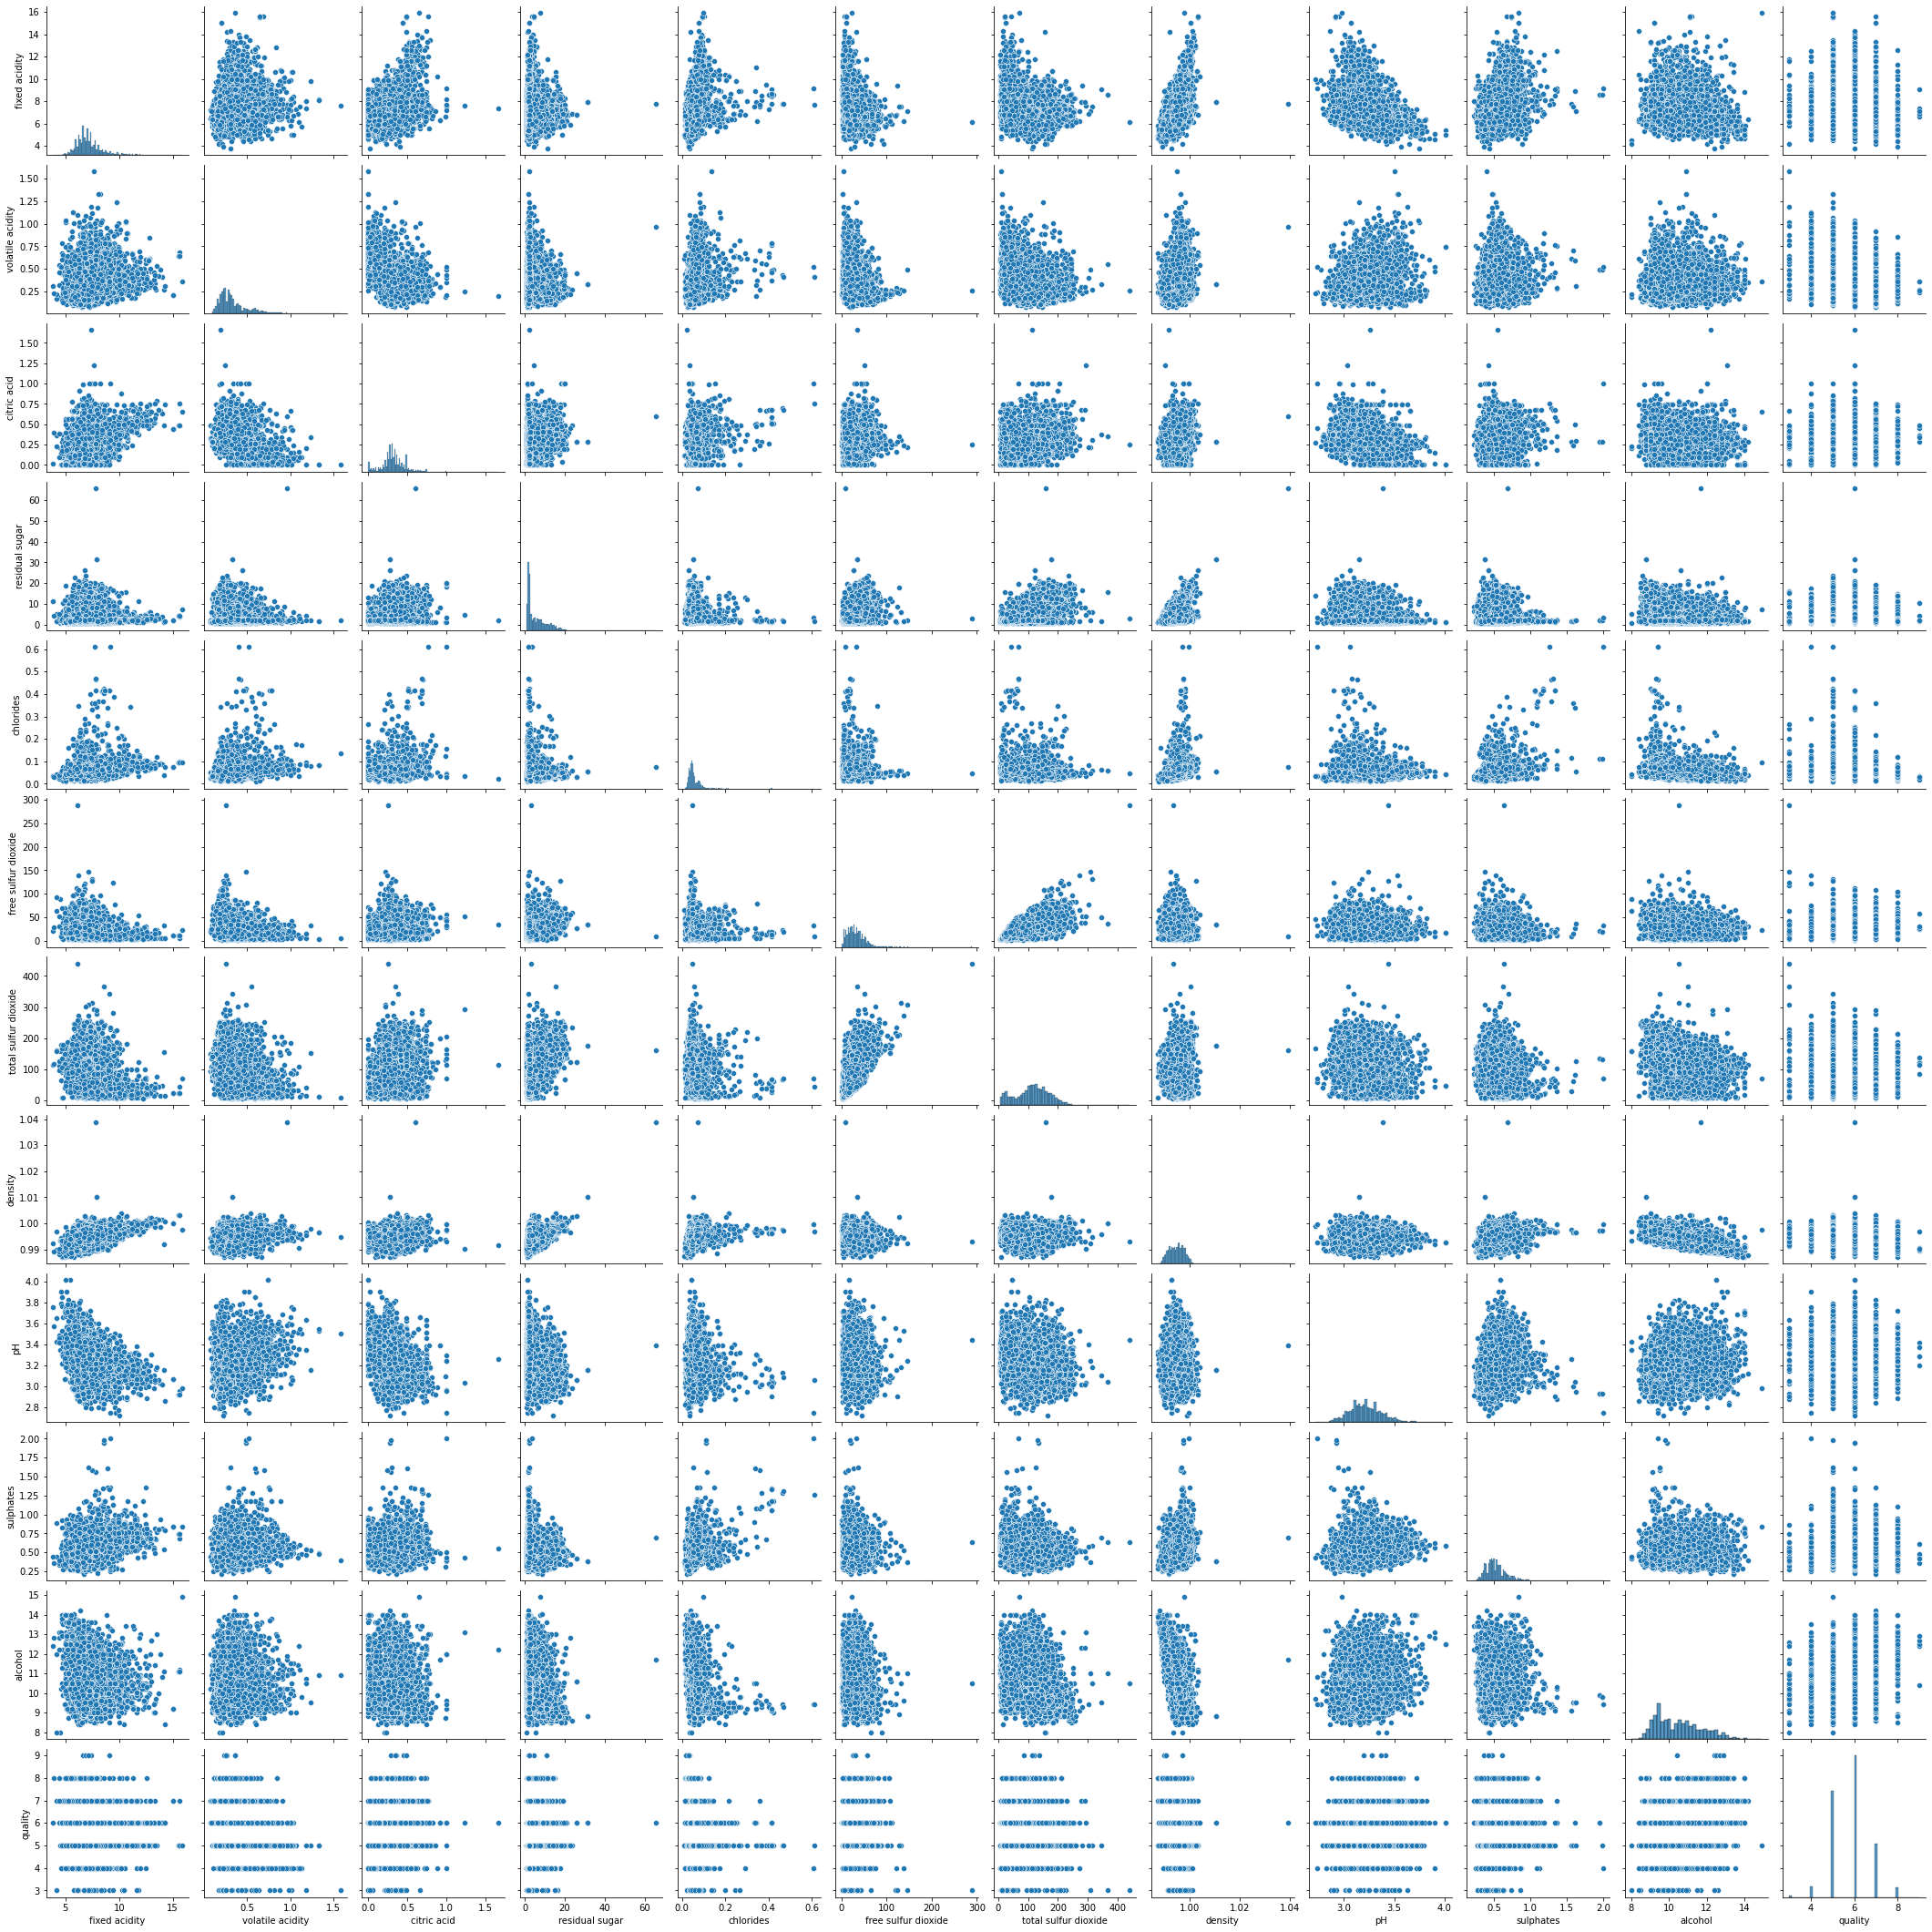

In [12]:
sb.pairplot(dataframe)
plt.show()

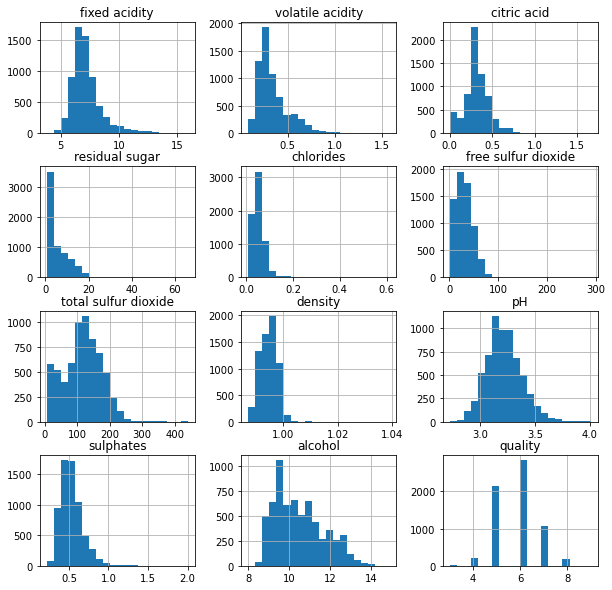

In [13]:
dataframe.hist(bins=20,figsize=(10,10))
plt.show()

NameError: name 'df' is not defined

<Figure size 1080x432 with 0 Axes>

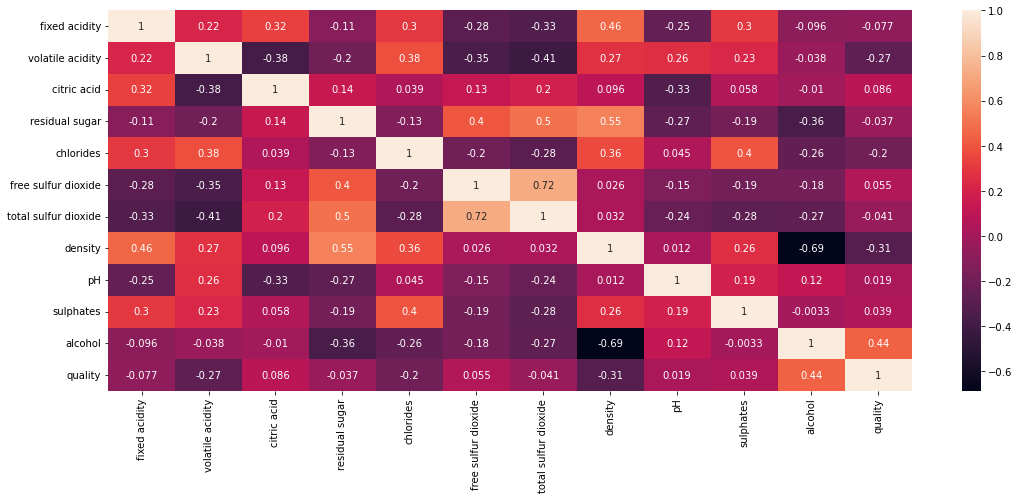

In [19]:
plt.figure(figsize=[18,7])
sb.heatmap(dataframe.corr(),annot=True)
plt.show()


In [26]:
colm = []

for i in range(len(dataframe.corr().keys())):
    for j in range(i):
        if abs(dataframe.corr().iloc[i,j]) > 0.7:
            colm = dataframe.corr().columns[i]


In [29]:

new_df = dataframe.drop('total sulfur dioxide',axis = 1)
new_df.update(new_df.fillna(new_df.mean()))



C:\Users\mypri\AppData\Local\Temp\ipykernel_25608\3745094222.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.update(new_df.fillna(new_df.mean()))


In [30]:
cat = new_df.select_dtypes(include='O')

df_dummies = pd.get_dummies(new_df,drop_first = True)
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [31]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in dataframe.quality]
print(df_dummies)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [39]:
conda install -c anaconda scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       haa95532_1         160 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_2         156 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    openssl-1.1.1n             |       h2bbff1b_0         5.8 MB  anaconda
    scikit-learn-1.0.2         |   py39hf11a4ad_1         6.9 MB  anaconda
    ------------------------------------------------------------
                                           Total:        13.9 MB

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> anaconda::conda-4.13.0-py39haa95532_0

The following packages will be SUPERSEDED by a higher-priority



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [40]:
from sklearn.preprocessing import train_test_split

x = df_dummies.drop(['quality','best quality'],axis=1)
y = df_dummies['best quality']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)


ImportError: cannot import name 'train_test_split' from 'sklearn.preprocessing' (D:\Anaconda\lib\site-packages\sklearn\preprocessing\__init__.py)